This notebook shows the preprocessing and visualization of the liver Visium data. We will only show it on one slide so it looks cleaner.

In [1]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sc.set_figure_params(facecolor="white", figsize=(8, 8))
sc.settings.verbosity = 3

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Reading the data

In [3]:
adata = sc.read_visium("/srv/scratch/lottep/cell2location/LiverData/JBO01")
adata.var_names_make_unique()
adata.var["mt"] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)

reading /srv/scratch/lottep/cell2location/LiverData/JBO01/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... storing 'feature_types' as categorical
... storing 'genome' as categorical


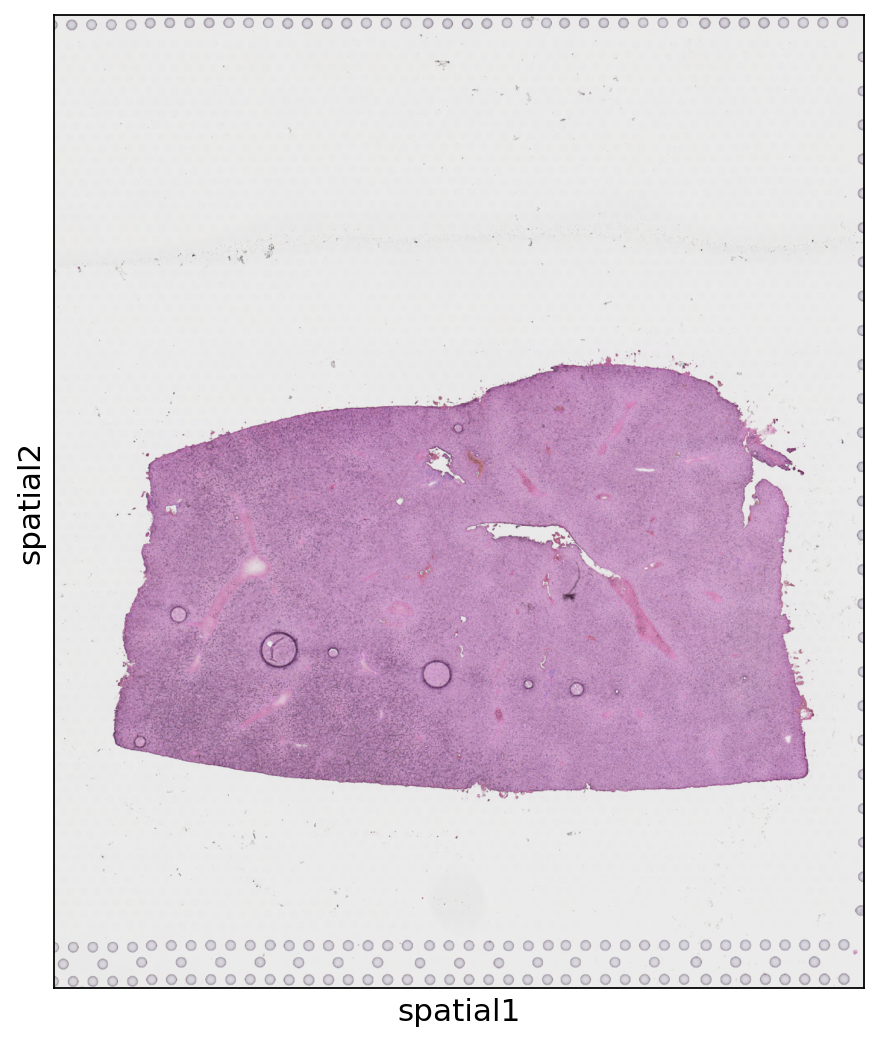

In [4]:
sc.pl.spatial(adata, size=0)

In [5]:
# adata structure
adata

AnnData object with n_obs × n_vars = 1646 × 31053
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'spatial'
    obsm: 'spatial'

In [6]:
adata.obs

in_tissue  array_row  array_col  n_genes_by_counts  \
AAACAAGTATCTCCCA-1          1         50        102               4959   
AAACACCAATAACTGC-1          1         59         19               4725   
AAACATTTCCCGGATT-1          1         61         97               4797   
AAACCCGAACGAAATC-1          1         45        115               4785   
AAACCGGGTAGGTACC-1          1         42         28               5326   
...                       ...        ...        ...                ...   
TTGTGTTTCCCGAAAG-1          1         51         59               4578   
TTGTTGTGTGTCAAGA-1          1         31         77               4955   
TTGTTTCACATCCAGG-1          1         58         42               4450   
TTGTTTCATTAGTCTA-1          1         60         30               3526   
TTGTTTCCATACAACT-1          1         45         27               5191   

                    log1p_n_genes_by_counts  total_counts  log1p_total_counts  \
AAACAAGTATCTCCCA-1                 8.509161       37642.0           10.535902   
AAACACCAATAACTGC-1                 8.460834       32229.0           10.380653   
AAACATTTCCCGGATT-1                 8.475954       35277.0           10.471015   
AAACCCGAACGAAATC-1                 8.473450       34632.0           10.452562   
AAACCGGGTAGGTACC-1                 8.580544       46259.0           10.742033   
...                                     ...           ...                 ...   
TTGTGTTTCCCGAAAG-1                 8.429236       31427.0           10.355454   
TTGTTGTGTGTCAAGA-1                 8.508354       41033.0           10.622156   
TTGTTTCACATCCAGG-1                 8.400884       30299.0           10.318903   
TTGTTTCATTAGTCTA-1                 8.168203       17827.0            9.788526   
TTGTTTCCATACAACT-1                 8.554874       37880.0           10.542205   

                    pct_counts_in_top_50_genes  pct_counts_in_top_100_genes  \
AAACAAGTATCTCCCA-1                   40.978163                    49.125976   
AAACACCAATAACTGC-1                   39.535822                    47.562754   
AAACATTTCCCGGATT-1                   39.138816                    47.733651   
AAACCCGAACGAAATC-1                   42.642643                    50.412913   
AAACCGGGTAGGTACC-1                   42.525779                    50.115653   
...                                        ...                          ...   
TTGTGTTTCCCGAAAG-1                   38.769211                    47.519649   
TTGTTGTGTGTCAAGA-1                   41.405698                    49.684400   
TTGTTTCACATCCAGG-1                   39.740585                    48.367933   
TTGTTTCATTAGTCTA-1                   41.123016                    49.189432   
TTGTTTCCATACAACT-1                   36.797782                    45.530623   

                    pct_counts_in_top_200_genes  pct_counts_in_top_500_genes  \
AAACAAGTATCTCCCA-1                    58.806652                    72.488178   
AAACACCAATAACTGC-1                    57.361383                    71.150206   
AAACATTTCCCGGATT-1                    57.777022                    71.468662   
AAACCCGAACGAAATC-1                    59.710672                    72.776623   
AAACCGGGTAGGTACC-1                    59.357098                    72.567500   
...                                         ...                          ...   
TTGTGTTTCCCGAAAG-1                    57.870621                    71.915869   
TTGTTGTGTGTCAAGA-1                    59.283991                    72.955914   
TTGTTTCACATCCAGG-1                    58.784118                    72.421532   
TTGTTTCATTAGTCTA-1                    58.630168                    72.115331   
TTGTTTCCATACAACT-1                    55.615100                    69.984161   

                    total_counts_mt  log1p_total_counts_mt  pct_counts_mt  
AAACAAGTATCTCCCA-1              0.0                    0.0            0.0  
AAACACCAATAACTGC-1              0.0                    0.0            0.0  
AAACATTTCCCGGATT-1  

## QC and preprocessing

<AxesSubplot:xlabel='n_genes_by_counts'>

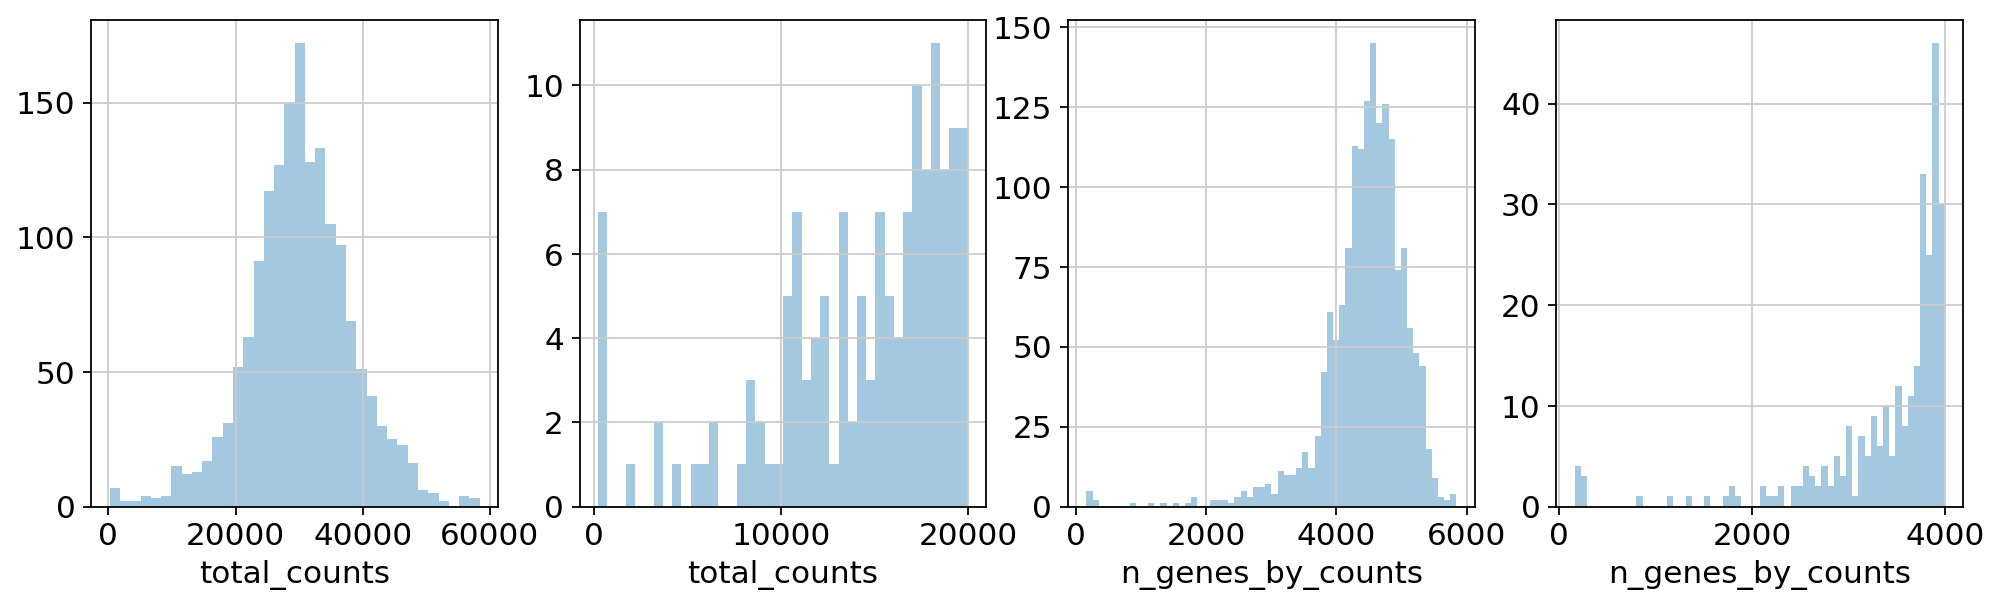

In [7]:
fig, axs = plt.subplots(1, 4, figsize=(15, 4))
sns.distplot(adata.obs["total_counts"], kde=False, ax=axs[0])
sns.distplot(adata.obs["total_counts"][adata.obs["total_counts"] < 20000], kde=False, bins=40, ax=axs[1])
sns.distplot(adata.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[2])
sns.distplot(adata.obs["n_genes_by_counts"][adata.obs["n_genes_by_counts"] < 4000], kde=False, bins=60, ax=axs[3])

In [8]:
print("Before filtering: {} cells and {} genes".format(*adata.shape))
sc.pp.filter_cells(adata, min_counts=11000) 
sc.pp.filter_cells(adata, max_counts=50000)
adata = adata[adata.obs["pct_counts_mt"] < 20]
sc.pp.filter_genes(adata, min_cells=10)
print("After filtering: {} cells and {} genes".format(*adata.shape))

Before filtering: 1646 cells and 31053 genes
filtered out 33 cells that have less than 11000 counts
filtered out 16 cells that have more than 50000 counts
filtered out 17552 genes that are detected in less than 10 cells


Trying to set attribute `.var` of view, copying.


After filtering: 1597 cells and 13501 genes


In [9]:
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=4000)

normalizing counts per cell
    finished (0:00:00)
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


## Manifold embedding and clustering based on transcriptional similarity

In [10]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, key_added="clusters")

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:18)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:05)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:09)
running Leiden clustering
    finished: found 7 clusters and added
    'clusters', the cluster labels (adata.obs, categorical) (0:00:00)


We plot some covariates to check if there is any particular structure in the UMAP associated with total counts and detected genes.

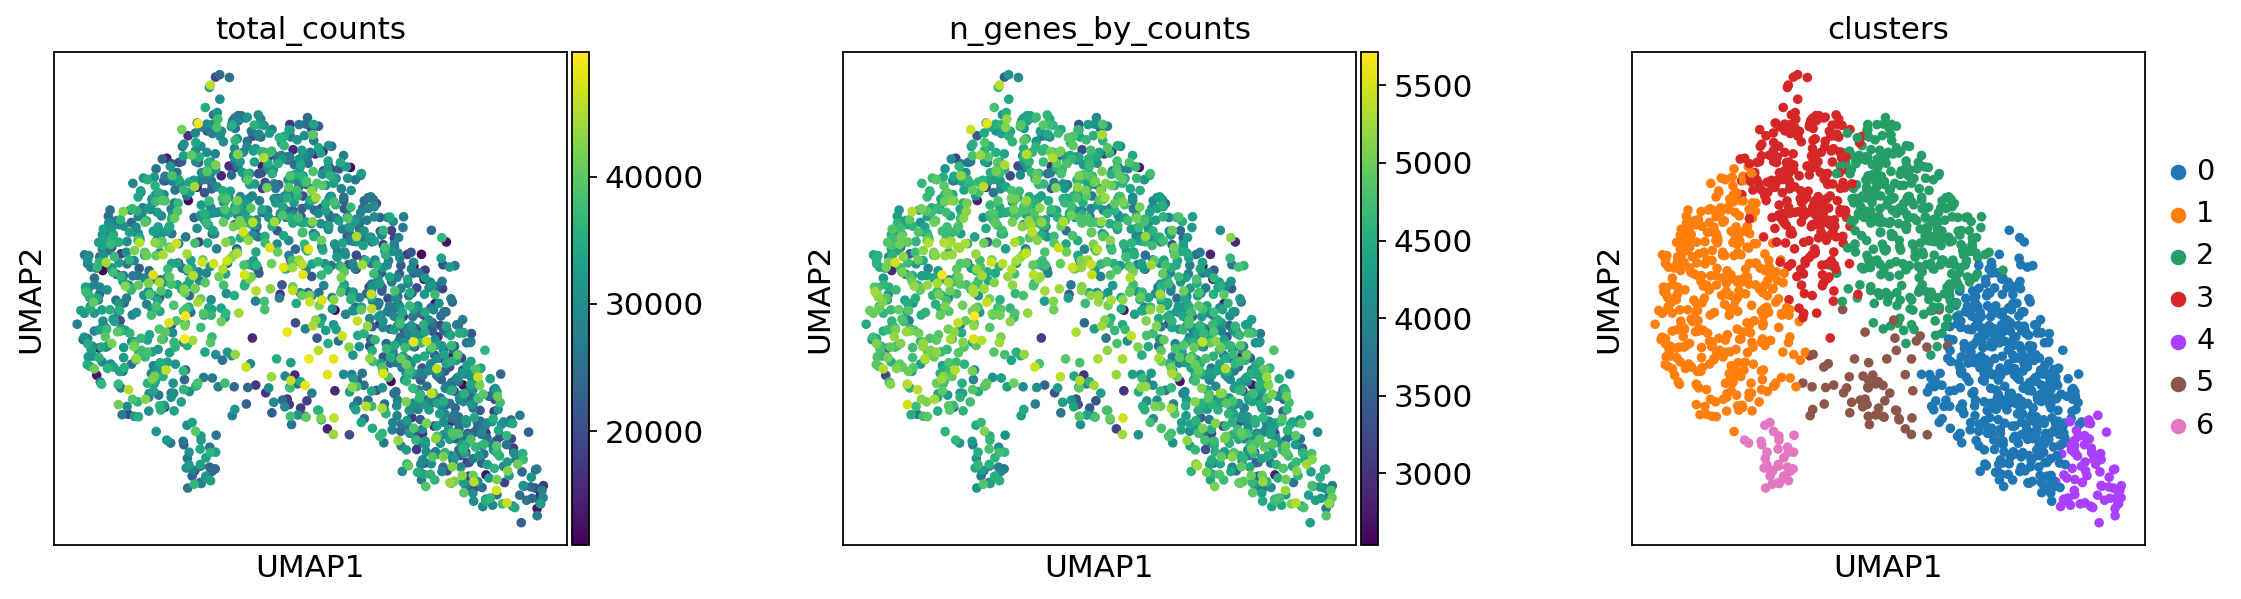

In [11]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata, color=["total_counts", "n_genes_by_counts", "clusters"], wspace=0.4)

## Visualization in spatial coordinates

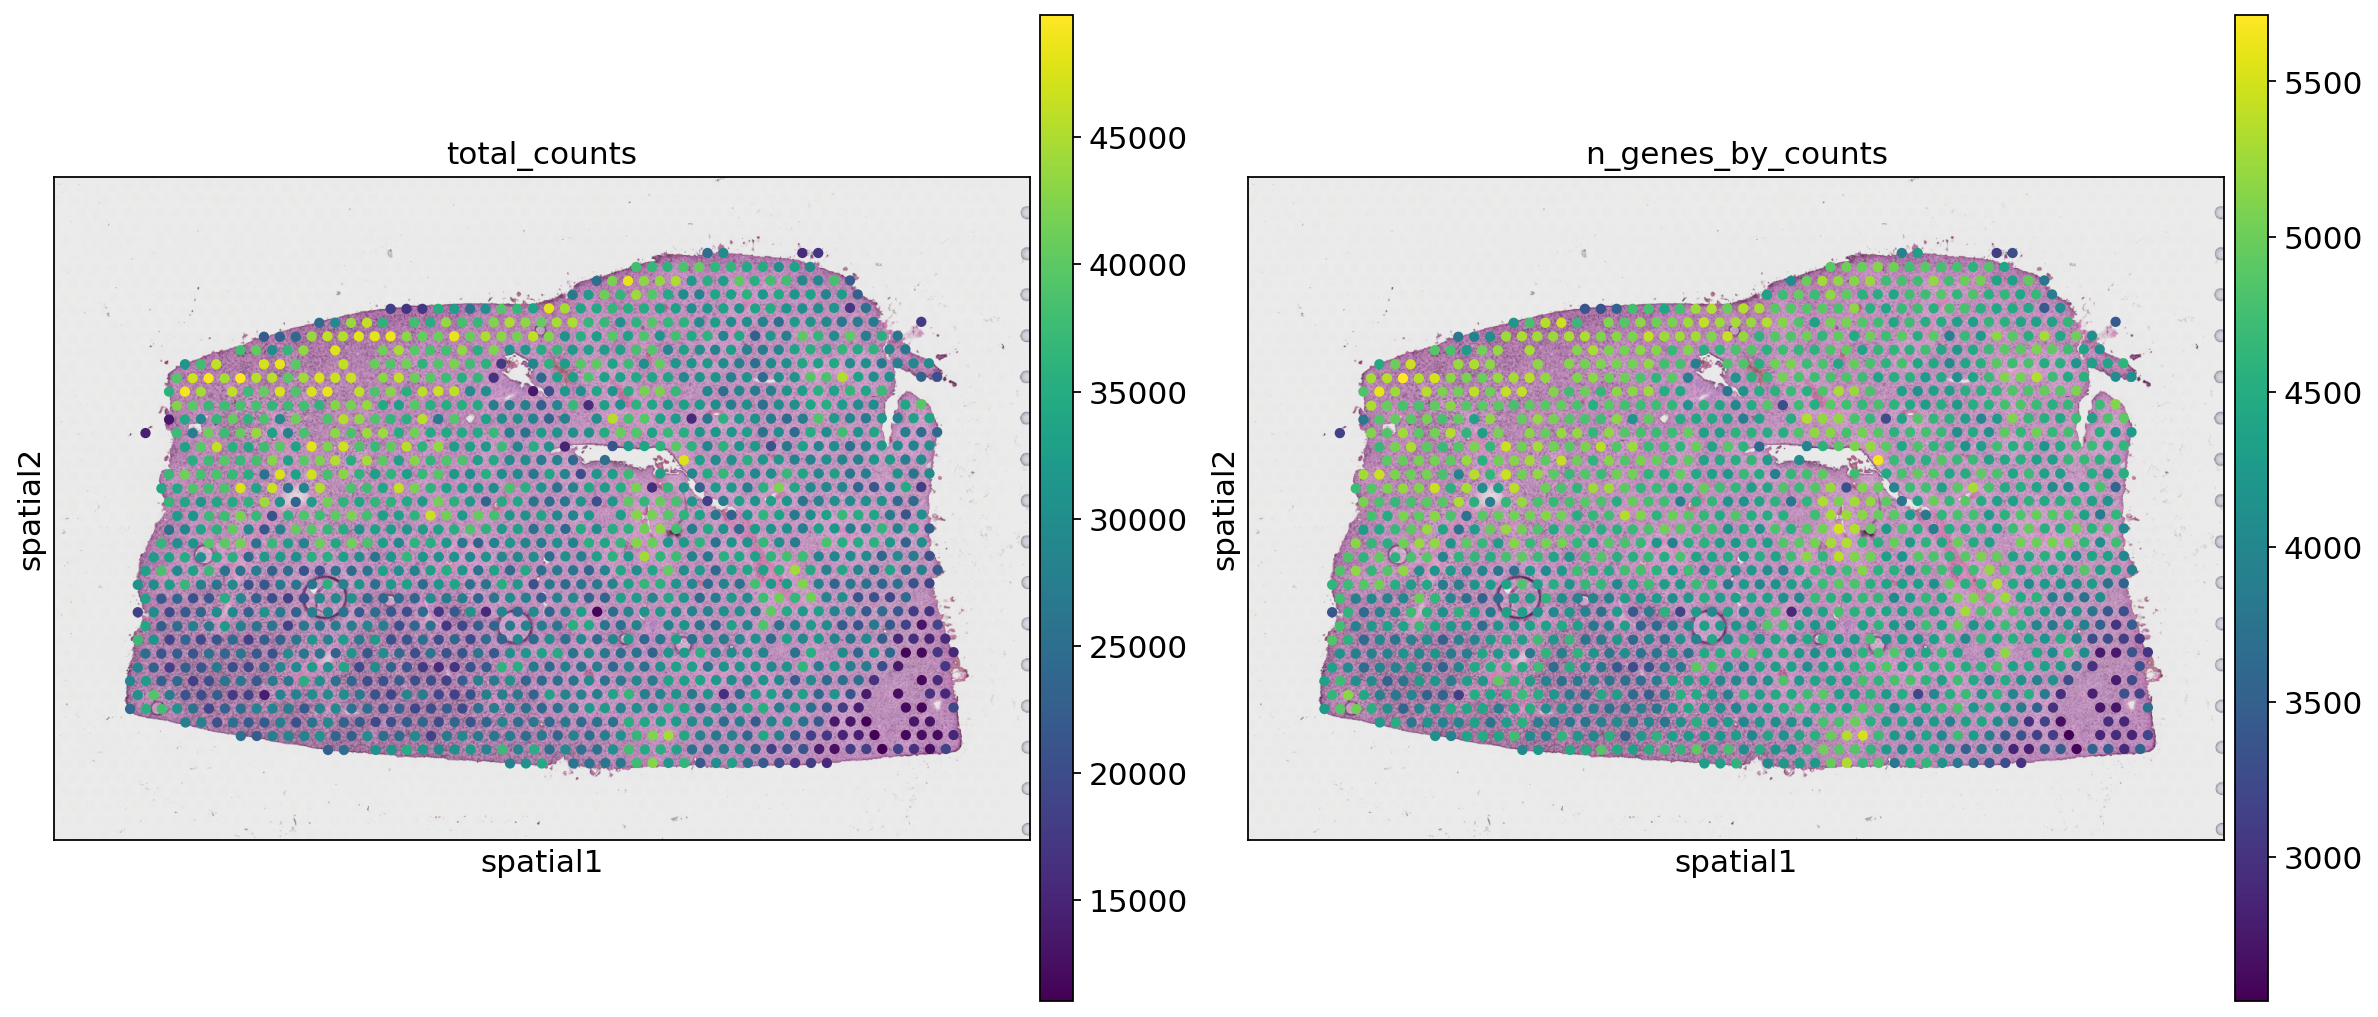

In [12]:
plt.rcParams["figure.figsize"] = (8, 8)
sc.pl.spatial(adata, img_key="hires", color=["total_counts", "n_genes_by_counts"])

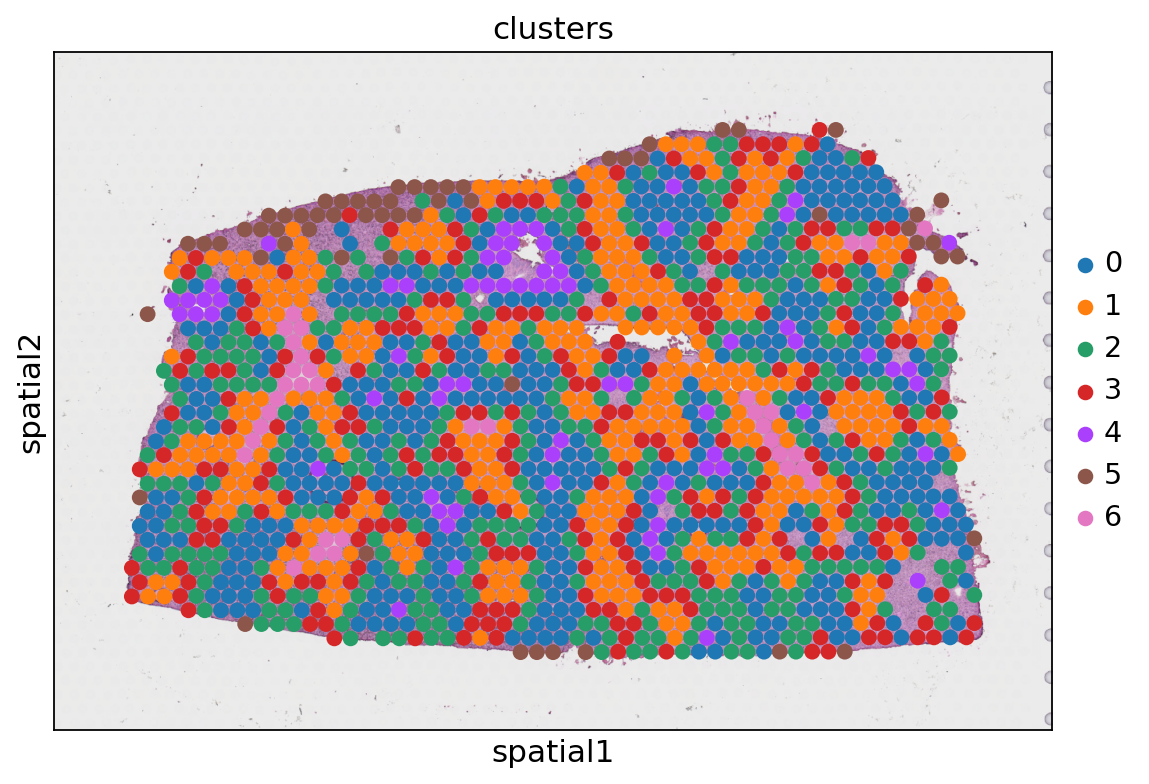

In [13]:
sc.pl.spatial(adata, img_key="hires", color="clusters", size=1.5)

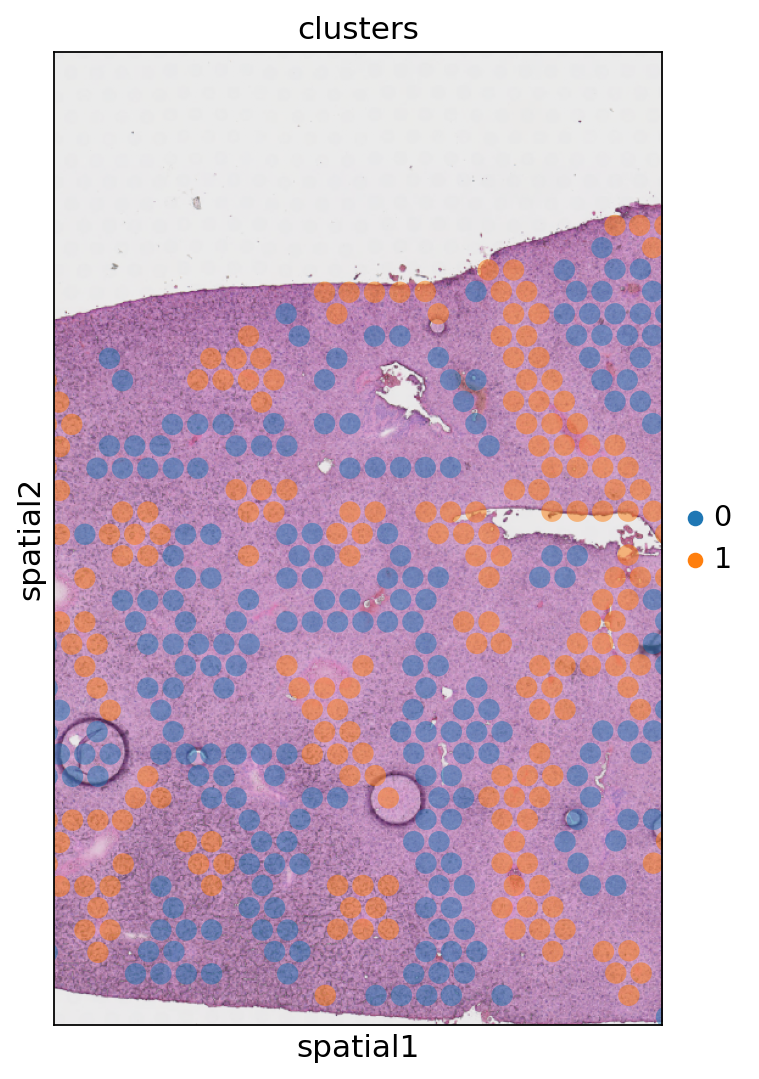

In [14]:
sc.pl.spatial(adata, img_key="hires", color="clusters", groups=["0", "1"],
              crop_coord=[700, 1200, 1300, 500], alpha=0.5, size=1.3)

## Cluster marker genes

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)
    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_clusters']`
categories: 0, 1, 2, etc.
var_group_labels: 1


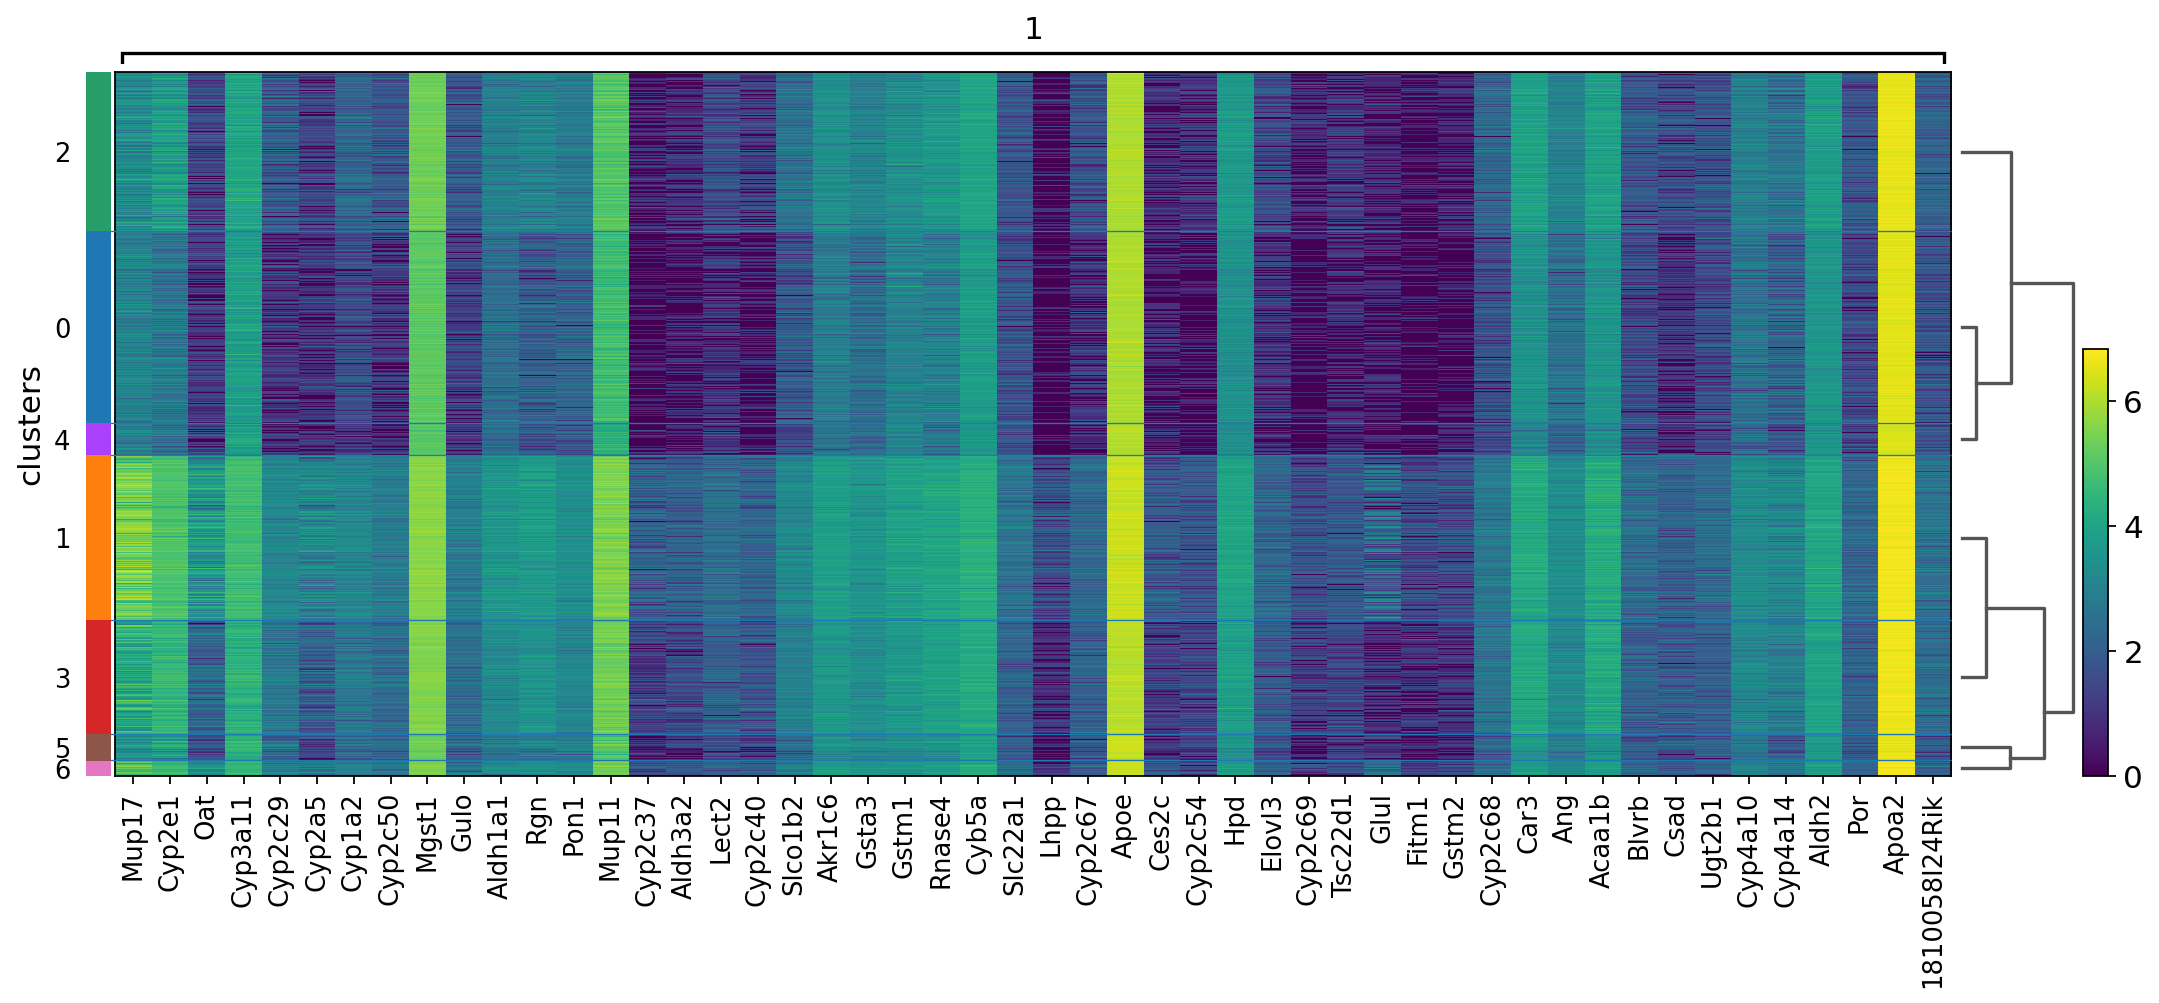

In [15]:
sc.tl.rank_genes_groups(adata, "clusters", method="t-test")
sc.pl.rank_genes_groups_heatmap(adata, groups="1", n_genes=50, groupby="clusters")

In [16]:
# Rank of a well-known marker gene?
np.where(np.array([x[1] for x in adata.uns['rank_genes_groups']['names']]) == 'Glul')

(array([34]),)

In [26]:
for i in range(7):
    loc = np.where(np.array([x[i] for x in adata.uns['rank_genes_groups']['names']]) == 'Glul')
    print("Cluster {}, rank of Glul: {}".format(i, loc[0][0]+1))

Cluster 0, rank of Glul: 13433
Cluster 1, rank of Glul: 35
Cluster 2, rank of Glul: 13490
Cluster 3, rank of Glul: 13416
Cluster 4, rank of Glul: 13377
Cluster 5, rank of Glul: 11298
Cluster 6, rank of Glul: 20


Glul is actually a gene well-known to have a diverse zonation pattern. Glul is highly expressed in the pericentral region.

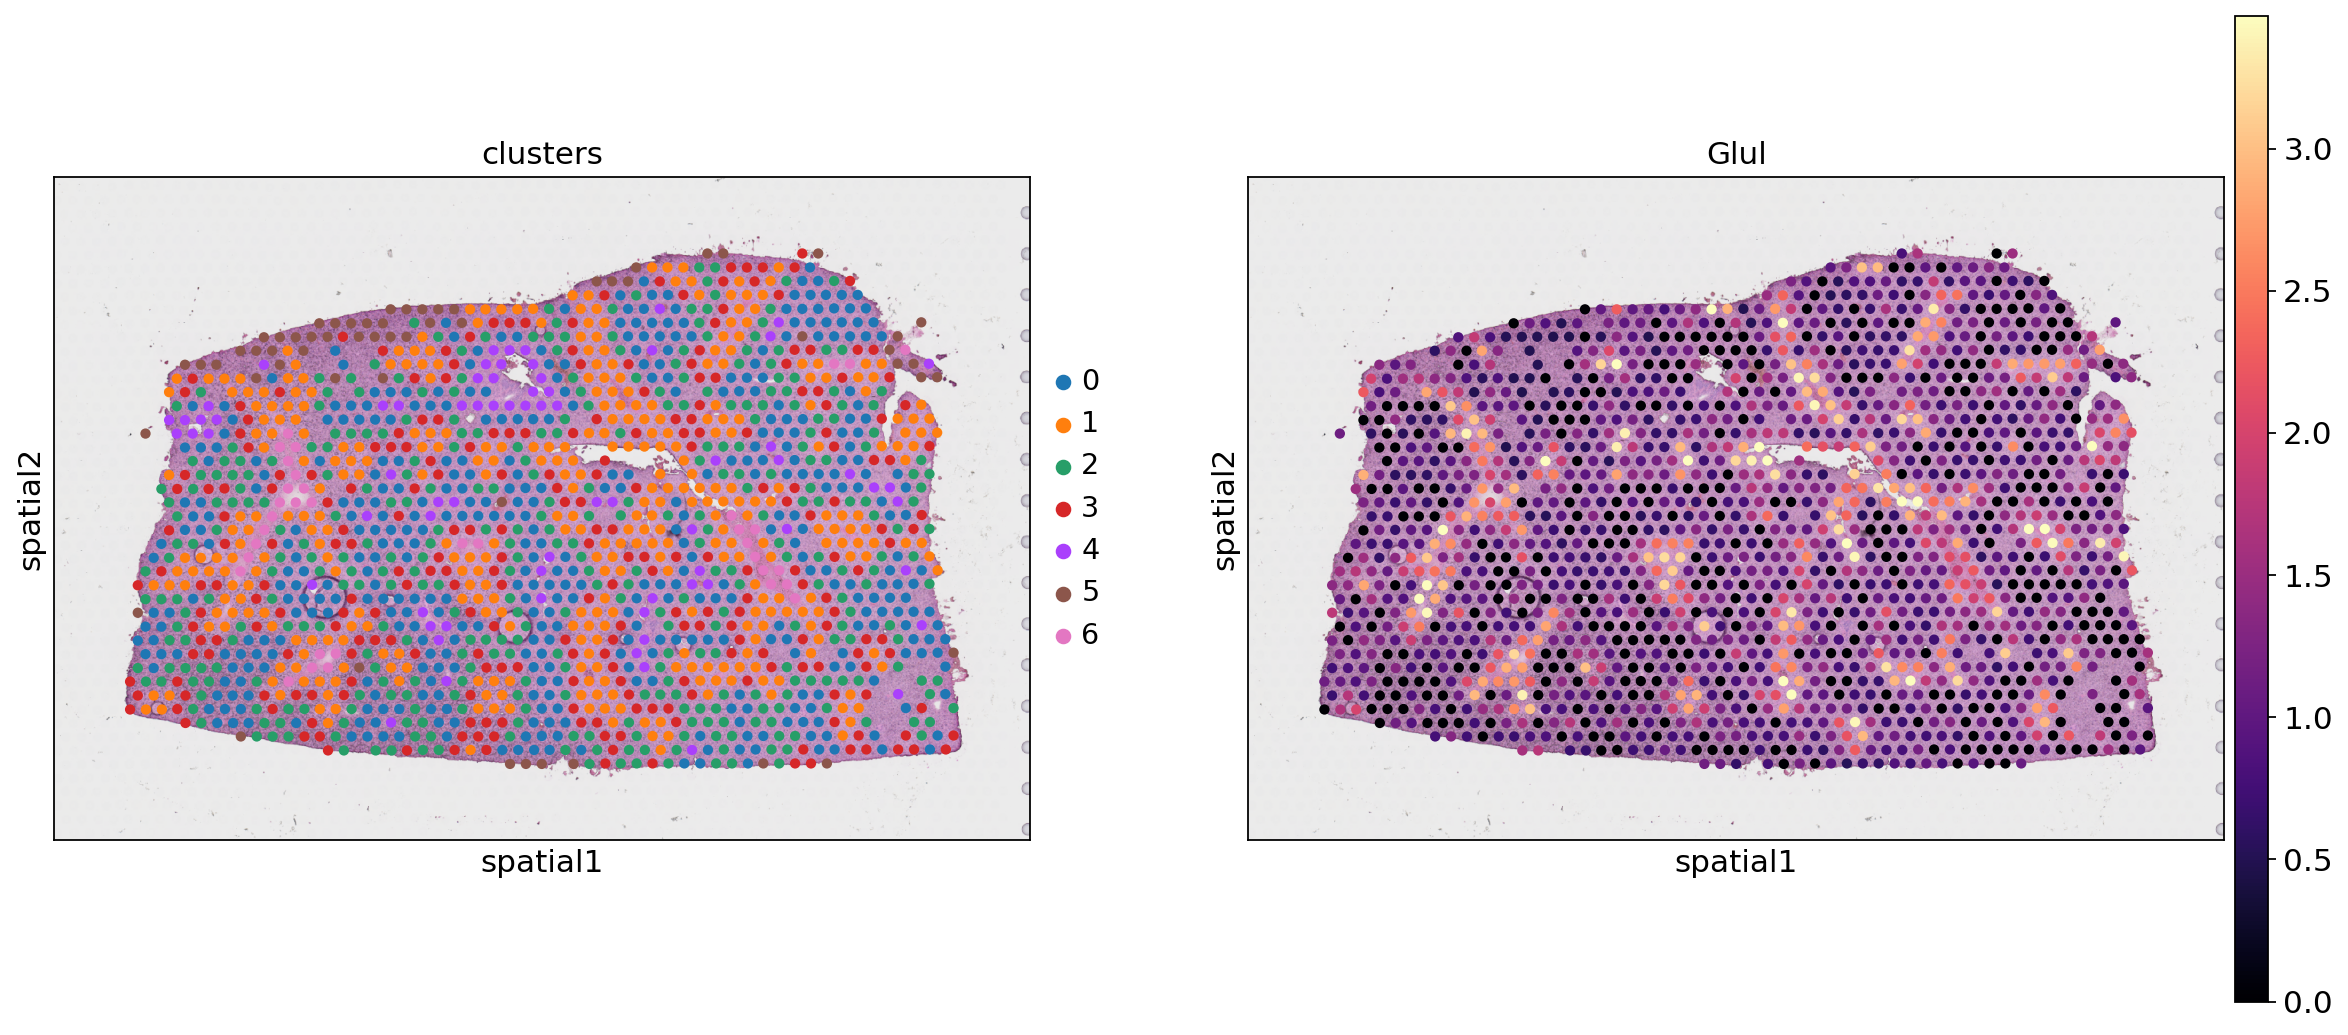

In [17]:
sc.pl.spatial(adata, color=["clusters", "Glul"], gene_symbols='SYMBOL',
                  vmin=0, vmax='p99.0', cmap='magma')

In [20]:
adata.obs['clusters'].to_csv("../../lotte_nb/clusters_list.csv")